<a id='home'>Home<a/>

<a href='#import_libs'>Import libraries<a/>   
<a href='#loaddataset'>Load Datasets<a/>   
<a href='#resultadoconsolidado'>Resultado consolidado por set<a/>   
<a href='#resultadomensal'>Resultado mensal por set<a/>   
<a href='#resultadosemanal'>Resultado semanal por set<a/>   
<a href='#estudoI-EVEREST'>Estudo I-EVEREST<a/>   
<a href='#estudoI-IFR5-VM'>Estudo I-IFR5-VM<a/>   
<a href='#estudoI-CMM4v2'>Estudo I-CMM4v2<a/>  
<a href='#estudoI-TRENDM12'>Estudo I-TRENDM12<a/>   
<a href='#estudoI-BBM15-JG'>Estudo I-BBM15-JG<a/>   
<a href='#estudoI-BBM4'>Estudo I-BBM4<a/>   
<a href='#estudoI-HongKong'>Estudo I-HongKong<a/>   
<a href='#estudoI-RSM15'>Estudo I-RSM15<a/>   
<a href='#estudoI-TBM4-SR'>Estudo I-TBM4-SR<a/>   
<a href='#estudoI-Pitagoras'>Estudo I-Pitagoras<a/>   
<a href='#estudoI-RompR1S1v2'>Estudo I-RompR1S1v2<a/>  
<a href='#estudoI-KTM3'>Estudo I-KTM3<a/>     
<a href='#estudoI-FORCEM5'>Estudo I-FORCEM5<a/>  
 

    

<a id='import_libs'>Import libraries</a>

In [2]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='loaddataset'>Load Datasets</a>

In [3]:
codecsa = pd.read_csv("Codetrading_CSA.csv",header=None,sep=';',names=['Set','Valor','Data'])
codecsa['Data'] = pd.to_datetime(codecsa['Data'], format="%d/%m/%Y %H:%M")
codecsa['Dia'] = pd.DatetimeIndex(codecsa['Data']).day
codecsa['Mes'] = pd.DatetimeIndex(codecsa['Data']).month
codecsa['Ano'] = pd.DatetimeIndex(codecsa['Data']).year
codecsa['Weekday'] = pd.DatetimeIndex(codecsa['Data']).weekday
codecsa['GainLoss'] = np.where(codecsa['Valor']>=0, 'Gain', 'Loss')
#codecsa.head(30)

dfcalendar = pd.read_csv("Calendario.csv",header=None,sep=';',names=['Dia','Mes','Ano','Payroll','Feriado USA','Venc Opção','Venc Índice'])
dfcalendar['Combined'] = dfcalendar['Dia'].map(str) + "-" +dfcalendar['Mes'].map(str) + "-" + dfcalendar['Ano'].map(str)

<a id='resultadoconsolidado'>1. Resultado consolidado por set<a/>

Quadro mostra o resumo dos sets ao longo do ano.

Colunas:
    
    Valor: Valor total de lucro do set durante o ano
    Nr Trades: Quantidade de trades feitos pelo set durante o ano
    Valor Trades Gain: Valor total dos trades 'Gain' feitos pelo set durante o ano

In [5]:
subcodecsa = codecsa[['Set','Valor']]
subcodecsa = subcodecsa[subcodecsa != ('I-PORTO')]
subcodecsa = subcodecsa[subcodecsa != ('I-Berlim')]
subcodecsa = subcodecsa[subcodecsa != ('I-ROMPMM-LL')]
subcodecsa = subcodecsa[subcodecsa != ('I-VOLRX')]
subcodecsa = subcodecsa[subcodecsa != ('I-AMM5-AW')]
subcodecsa = subcodecsa[subcodecsa != ('I-PNY-1TDP')]
subcodecsa = subcodecsa[subcodecsa != ('I-RPGAPM3')]
subcodecsa = subcodecsa[subcodecsa != ('I-AMM15v2')]
subcodecsa = subcodecsa[subcodecsa != ('I-SkyDiving-JG')]
subcodecsa = subcodecsa[subcodecsa != ('I-HAWAII')]
subcodecsa = subcodecsa[subcodecsa != ('D-ROMP-LD')]
subcodecsa = subcodecsa[subcodecsa != ('I-BBM4-OBV')]
subcodecsa = subcodecsa[subcodecsa != ('I-BBM10-HA')]
dfgpby = subcodecsa.groupby(['Set']).sum()
dfgpby['Nr Trades'] = subcodecsa.groupby(['Set']).count()
dfgpby['Nr Trades Gain'] = subcodecsa[subcodecsa['Valor'] > 0].groupby(['Set']).count()
dfgpby['Valor Trades Gain'] = subcodecsa[subcodecsa['Valor'] > 0].groupby(['Set']).sum()
dfgpby['Nr Trades Loss'] = subcodecsa[subcodecsa['Valor'] <= 0].groupby(['Set']).count()
dfgpby['Valor Trades Loss'] = subcodecsa[subcodecsa['Valor'] < 0].groupby(['Set']).sum()
dfgpby['Porc. Trades Gain'] = dfgpby['Nr Trades Gain'] / dfgpby['Nr Trades']
dfgpby['Porc. Acerto'] = dfgpby['Nr Trades Gain'] / dfgpby['Nr Trades Loss']
dfgpby['Media $$'] = subcodecsa.groupby(['Set']).mean()
dfgpby['Valor Max'] = subcodecsa.groupby(['Set']).max()
dfgpby['Valor Min'] = subcodecsa.groupby(['Set']).min()
dfgpby.sort_values(['Valor'],ascending=False)

,Valor,Nr Trades,Nr Trades Gain,Valor Trades Gain,Nr Trades Loss,Valor Trades Loss,Porc. Trades Gain,Porc. Acerto,Media $$,Valor Max,Valor Min
Set,,,,,,,,,,,
I-CMM4v2,4095,95,51,7912,44,-3817,0.536842,1.159091,43.105263,346,-126
I-BBM4,1928,173,104,7974,69,-6046,0.601156,1.507246,11.144509,311,-123
I-RompR1S1v2,1147,38,25,2381,13,-1234,0.657895,1.923077,30.184211,222,-124
I-BBM15-JG,907,38,16,2210,22,-1303,0.421053,0.727273,23.868421,364,-79
I-FORCEM5,591,75,50,2299,25,-1708,0.666667,2.000000,7.880000,79,-97
I-RSM15,571,38,24,1663,14,-1092,0.631579,1.714286,15.026316,235,-195
I-TRENDM12,366,41,19,1732,22,-1366,0.463415,0.863636,8.926829,316,-107
I-HongKong,171,46,25,2078,21,-1907,0.543478,1.190476,3.717391,195,-126
I-TBM4-SR,-2,115,57,3656,58,-3658,0.495652,0.982759,-0.017391,173,-157


3. <a id='resultadomensal'>Resultado mensal por set<a/>

In [5]:
subcodecsa1 = codecsa[['Set','Valor','Mes']]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-PORTO')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-Berlim')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-ROMPMM-LL')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-Pitagoras')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-VOLRX')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-AMM5-AW')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-PNY-1TDP')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-RPGAPM3')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-AMM15v2')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-SkyDiving-JG')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-HAWAII')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-FORCEM5')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('D-ROMP-LD')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-BBM4-OBV')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-BBM10-HA')]
codecsa3 = subcodecsa1.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
codecsa3.columns = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro']

codecsa3soma = [[codecsa3.Janeiro.sum(),codecsa3.Fevereiro.sum(),codecsa3.Março.sum(),codecsa3.Abril.sum(),codecsa3.Maio.sum(),codecsa3.Junho.sum(),codecsa3.Julho.sum(),codecsa3.Agosto.sum(),codecsa3.Setembro.sum(),codecsa3.Outubro.sum()]]
codecsa3soma1 = pd.DataFrame(codecsa3soma, columns=['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro'])

codecsa22 = codecsa3.append(codecsa3soma1, sort=False)
codecsa22['Total Linha'] = codecsa22.sum(axis=1)
codecsa22.head(50)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Total Linha
I-BBM15-JG,181,-59,0,0,0,372,24,149,393,-153,907
I-BBM4,117,188,352,272,416,200,-113,169,307,20,1928
I-CMM4v2,137,870,682,899,369,572,219,402,486,-541,4095
I-EVEREST,0,0,-157,373,-91,-533,20,219,-73,-467,-709
I-HongKong,0,0,0,0,0,261,173,402,-265,-400,171
I-IFR5-VM,73,-298,166,133,-2,327,-174,-18,-324,0,-117
I-PORTO,0,-233,379,132,412,-175,159,0,-181,-345,148
I-RSM15,318,262,0,0,0,-176,621,-14,-191,-249,571
I-RompR1S1v2,46,43,0,14,-120,322,-15,467,97,293,1147
I-TBM4-SR,-40,164,173,5,87,280,-117,-254,33,-333,-2


4. <a id='resultadosemanal'>Resultado semanal por set<a/>

In [122]:
subcodecsa1 = codecsa[['Set','Valor','Weekday']]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-PORTO')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-Berlim')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-ROMPMM-LL')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-Pitagoras')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-VOLRX')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-AMM5-AW')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-PNY-1TDP')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-RPGAPM3')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-AMM15v2')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-SkyDiving-JG')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-HAWAII')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-FORCEM5')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('D-ROMP-LD')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-BBM4-OBV')]
subcodecsa1 = subcodecsa1[subcodecsa1 != ('I-BBM10-HA')]
codecsa3 = subcodecsa1.groupby(['Set','Weekday'])['Valor'].sum().unstack(fill_value = 0)
codecsa3.columns = ['Segunda','Terça','Quarta','Quinta','Sexta']

codecsa3soma = [[codecsa3.Segunda.sum(),codecsa3.Terça.sum(),codecsa3.Quarta.sum(),codecsa3.Quinta.sum(),codecsa3.Sexta.sum()]]
codecsa3soma1 = pd.DataFrame(codecsa3soma, columns=['Segunda','Terça','Quarta','Quinta','Sexta'])

codecsa33 = codecsa3.append(codecsa3soma1, sort=False)
codecsa33['Total Linha'] = codecsa33.sum(axis=1)
codecsa33.head(50)

,Segunda,Terça,Quarta,Quinta,Sexta,Total Linha
I-BBM15-JG,602,-46,105,163,83,907
I-BBM4,658,601,394,612,-337,1928
I-CMM4v2,438,722,1571,821,543,4095
I-EVEREST,25,-177,-776,227,-8,-709
I-HongKong,-117,-25,-100,229,184,171
I-IFR5-VM,-519,568,331,-328,-169,-117
I-KTM3,-552,208,48,96,-385,-585
I-RSM15,146,115,-1,1,310,571
I-RompR1S1v2,478,296,199,174,0,1147
I-TBM4-SR,-137,52,177,65,-159,-2


5. Calendário de Operações

In [5]:
subcodecsa1 = codecsa[['Dia','Mes','Ano','Valor']]
subcodecsa1['Combined'] = subcodecsa1['Dia'].map(str) + "-" +subcodecsa1['Mes'].map(str) + "-" + subcodecsa1['Ano'].map(str)

subcodecsa11 = subcodecsa1[['Combined','Valor']]
subcodecsa11 = subcodecsa11.groupby(['Combined']).sum()

CalendarCSA = pd.merge(subcodecsa11,dfcalendar,on='Combined')

#CalendarCSA.head(20)

CalendarCSAPayroll = CalendarCSA[CalendarCSA['Payroll'] == 'Yes']
TotalPayroll = CalendarCSAPayroll['Valor'].sum()

CalendarCSAFeriadoUSA = CalendarCSA[CalendarCSA['Feriado USA'] == 'Yes']
TotalFeriadoUSA = CalendarCSAFeriadoUSA['Valor'].sum()

CalendarCSAVencOpcao = CalendarCSA[CalendarCSA['Venc Opção'] == 'Yes']
TotalVencOpcao = CalendarCSAVencOpcao['Valor'].sum()

CalendarCSAVencIndice = CalendarCSA[CalendarCSA['Venc Índice'] == 'Yes']
TotalVencIndice = CalendarCSAVencIndice['Valor'].sum()

print ("Valor Acumulado Payroll: {}".format(TotalPayroll))
print ("Valor Acumulado Feriado USA: {}".format(TotalFeriadoUSA))
print ("Valor Acumulado Vencimento Opção: {}".format(TotalVencOpcao))
print ("Valor Acumulado Vencimento Indice: {}".format(TotalVencIndice))

Valor Acumulado Payroll: -512
Valor Acumulado Feriado USA: -1169
Valor Acumulado Vencimento Opção: -160
Valor Acumulado Vencimento Indice: 824


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<a id='estudoI-EVEREST'>Estudo do Set = I-EVEREST<a/> - <a href='#home'>Home<a/>

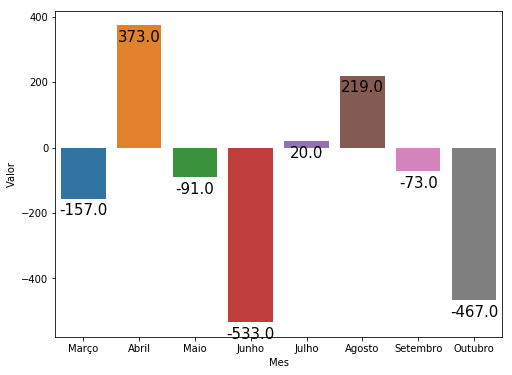

In [119]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-EVEREST')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Março","Abril","Maio","Junho","Julho","Agosto","Setembro","Outubro"]
Valor = [subcodecsaCMM4[3].values[0],
         subcodecsaCMM4[4].values[0],
         subcodecsaCMM4[5].values[0],
         subcodecsaCMM4[6].values[0],
         subcodecsaCMM4[7].values[0],
         subcodecsaCMM4[8].values[0],
         subcodecsaCMM4[9].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


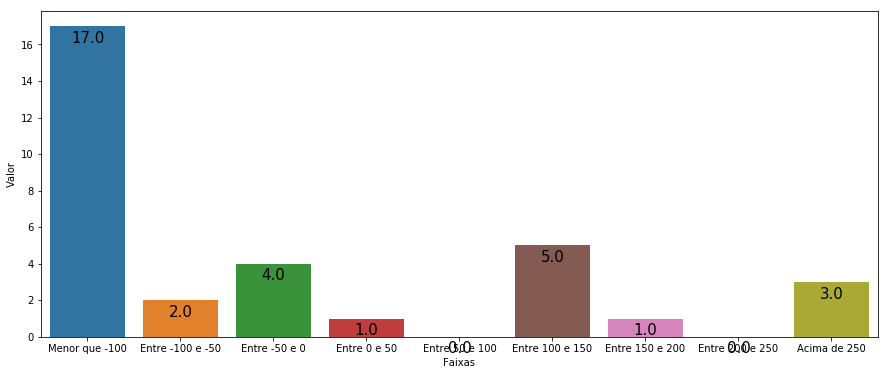

In [70]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-EVEREST')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCA0D3EF28>],
      dtype=object)

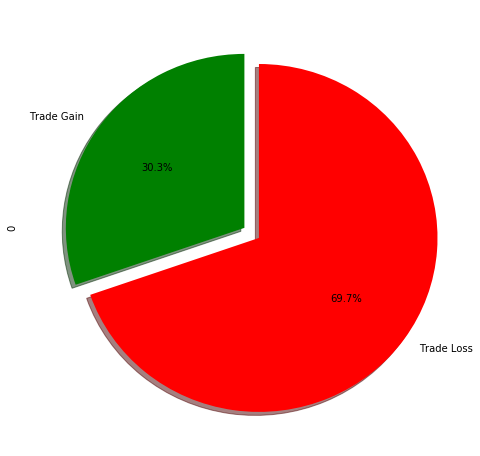

In [13]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-EVEREST')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)

<a id='estudoI-IFR5-VM'>Estudo do Set = I-IFR5-VM<a/> - <a href='#home'>Home<a/>

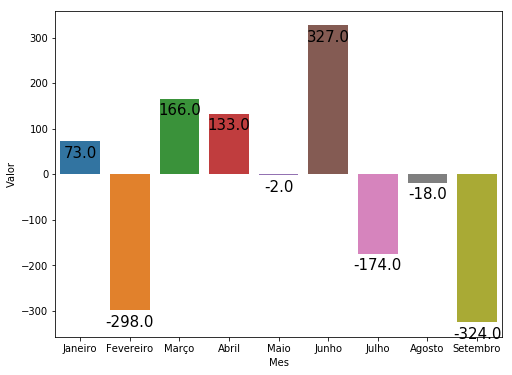

In [113]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-IFR5-VM')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()


Mes = ["Janeiro","Fevereiro","Março","Abril","Maio","Junho","Julho","Agosto","Setembro"]
Valor = [subcodecsaCMM4[1].values[0],
         subcodecsaCMM4[2].values[0],
         subcodecsaCMM4[3].values[0],
         subcodecsaCMM4[4].values[0],
         subcodecsaCMM4[5].values[0],
         subcodecsaCMM4[6].values[0],
         subcodecsaCMM4[7].values[0],
         subcodecsaCMM4[8].values[0],
         subcodecsaCMM4[9].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


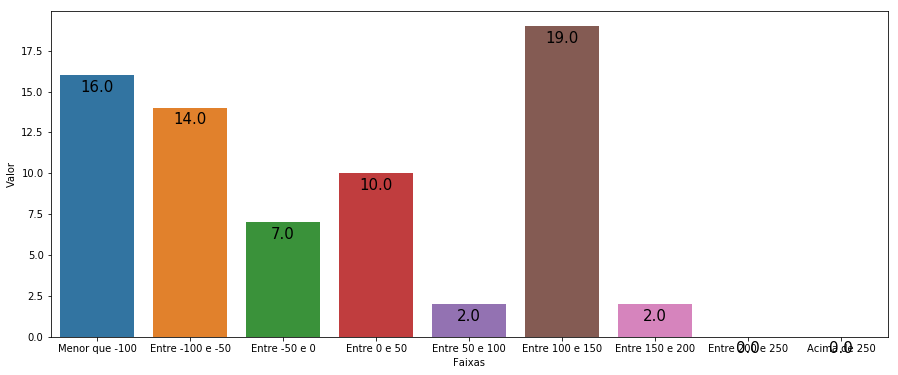

In [114]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-IFR5-VM')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCA201D8D0>],
      dtype=object)

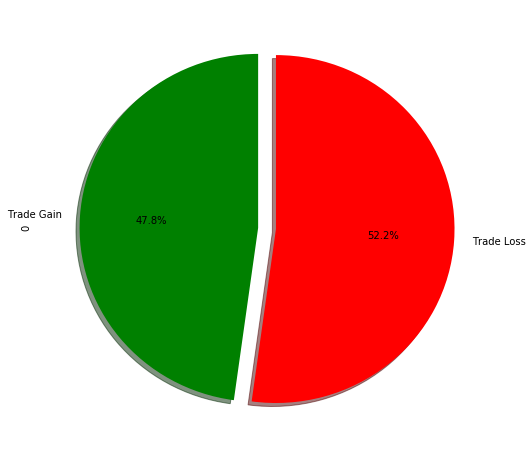

In [115]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-IFR5-VM')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)

<a id='estudoI-CMM4v2'>Estudo do Set = I-CMM4v2<a/> - <a href='#home'>Home<a/>

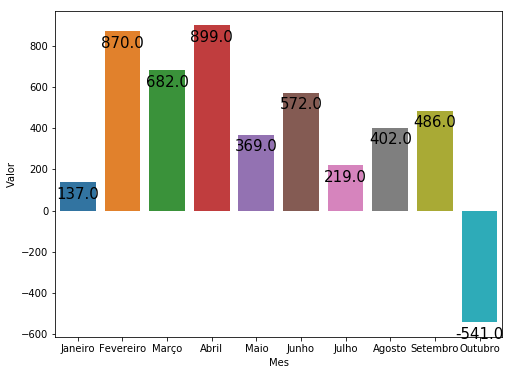

In [110]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-CMM4v2')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Janeiro","Fevereiro","Março","Abril","Maio","Junho","Julho","Agosto","Setembro","Outubro"]
Valor = [subcodecsaCMM4[1].values[0],
         subcodecsaCMM4[2].values[0],
         subcodecsaCMM4[3].values[0],
         subcodecsaCMM4[4].values[0],
         subcodecsaCMM4[5].values[0],
         subcodecsaCMM4[6].values[0],
         subcodecsaCMM4[7].values[0],
         subcodecsaCMM4[8].values[0],
         subcodecsaCMM4[9].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


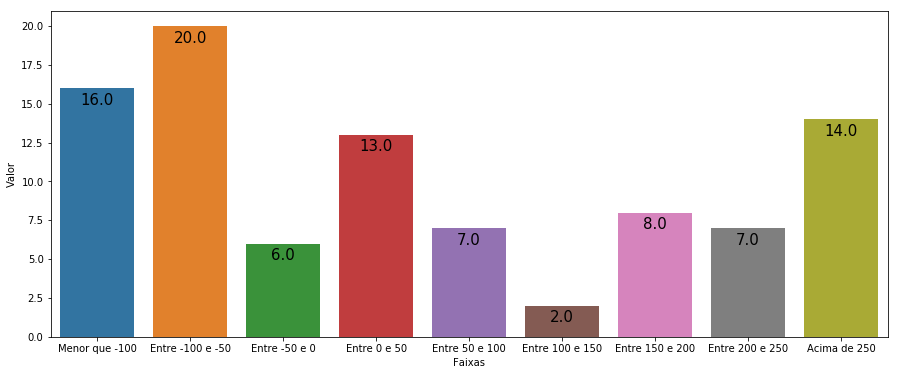

In [71]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-CMM4v2')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCA418A940>],
      dtype=object)

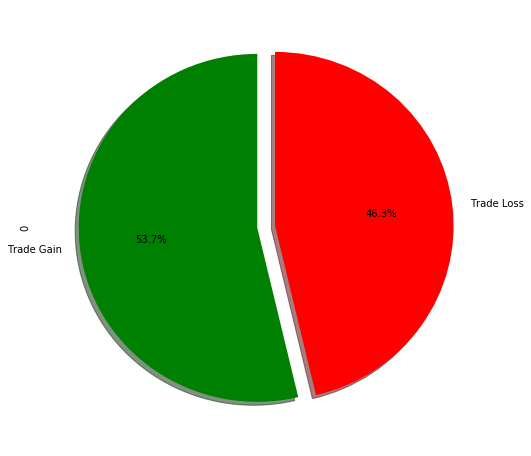

In [111]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-CMM4v2')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)

<a id='estudoI-TRENDM12'>Estudo do Set = I-TRENDM12<a/> - <a href='#home'>Home<a/>

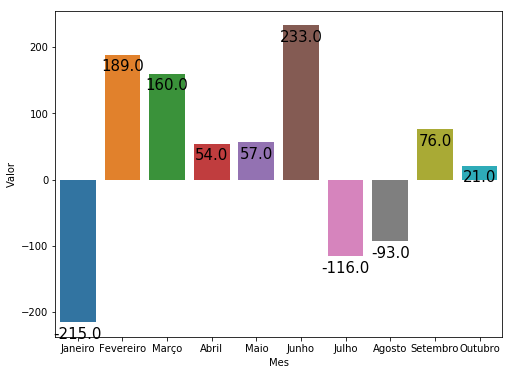

In [109]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-TRENDM12')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Janeiro","Fevereiro","Março","Abril","Maio","Junho","Julho","Agosto","Setembro","Outubro"]
Valor = [subcodecsaCMM4[1].values[0],
         subcodecsaCMM4[2].values[0],
         subcodecsaCMM4[3].values[0],
         subcodecsaCMM4[4].values[0],
         subcodecsaCMM4[5].values[0],
         subcodecsaCMM4[6].values[0],
         subcodecsaCMM4[7].values[0],
         subcodecsaCMM4[8].values[0],
         subcodecsaCMM4[9].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


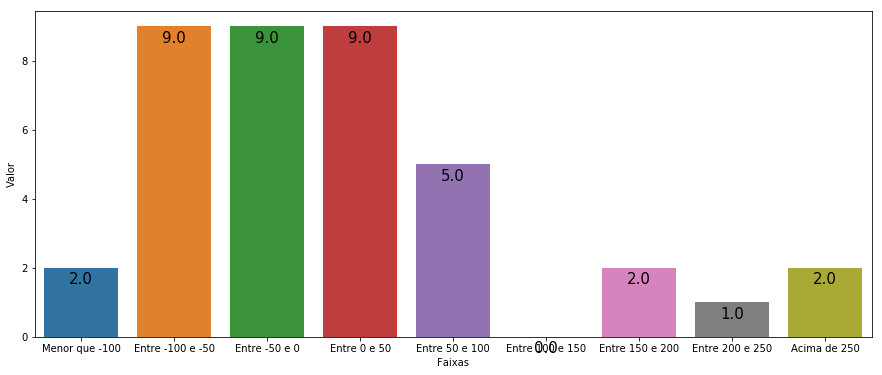

In [72]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-TRENDM12')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCA40D77B8>],
      dtype=object)

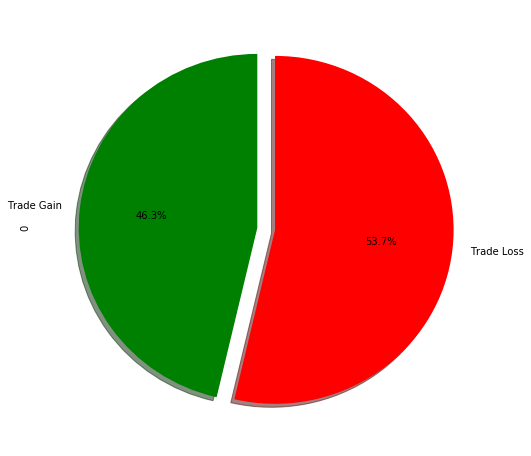

In [14]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-TRENDM12')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)

<a id='estudoI-BBM15-JG'>Estudo do Set = I-BBM15-JG<a/> - <a href='#home'>Home<a/>

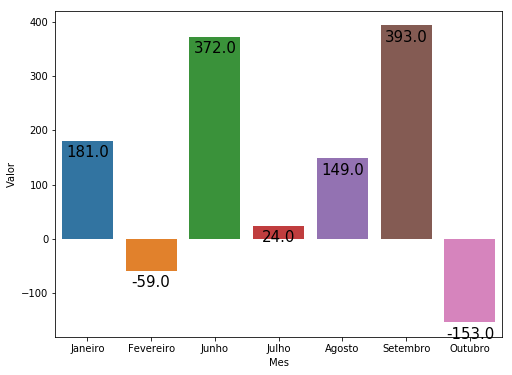

In [108]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-BBM15-JG')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Janeiro","Fevereiro","Junho","Julho","Agosto","Setembro","Outubro"]
Valor = [subcodecsaCMM4[1].values[0],
         subcodecsaCMM4[2].values[0],
         subcodecsaCMM4[6].values[0],
         subcodecsaCMM4[7].values[0],
         subcodecsaCMM4[8].values[0],
         subcodecsaCMM4[9].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


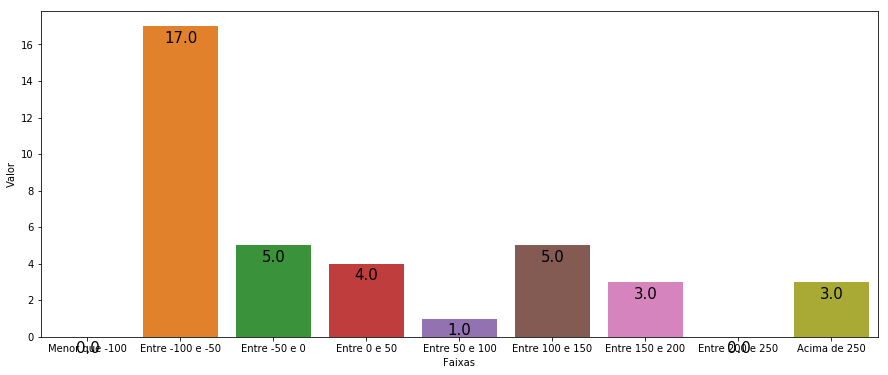

In [73]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-BBM15-JG')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCA474ED30>],
      dtype=object)

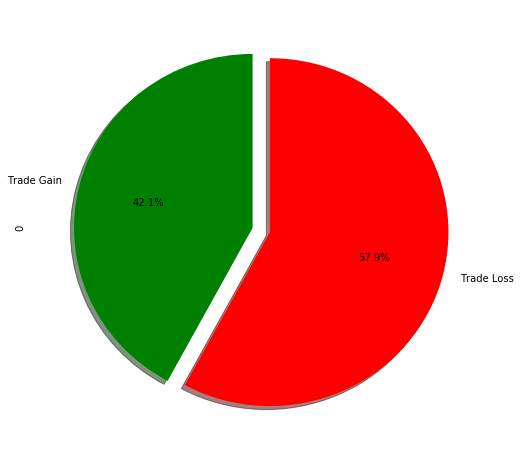

In [74]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-BBM15-JG')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)

<a id='estudoI-BBM4'>Estudo do Set = I-BBM4<a/> - <a href='#home'>Home<a/>

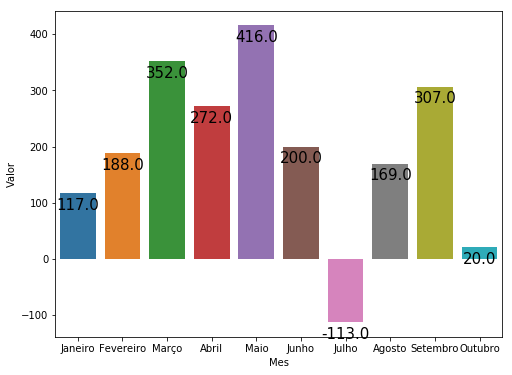

In [107]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-BBM4')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Janeiro","Fevereiro","Março","Abril","Maio","Junho","Julho","Agosto","Setembro","Outubro"]
Valor = [subcodecsaCMM4[1].values[0],
         subcodecsaCMM4[2].values[0],
         subcodecsaCMM4[3].values[0],
         subcodecsaCMM4[4].values[0],
         subcodecsaCMM4[5].values[0],
         subcodecsaCMM4[6].values[0],
         subcodecsaCMM4[7].values[0],
         subcodecsaCMM4[8].values[0],
         subcodecsaCMM4[9].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


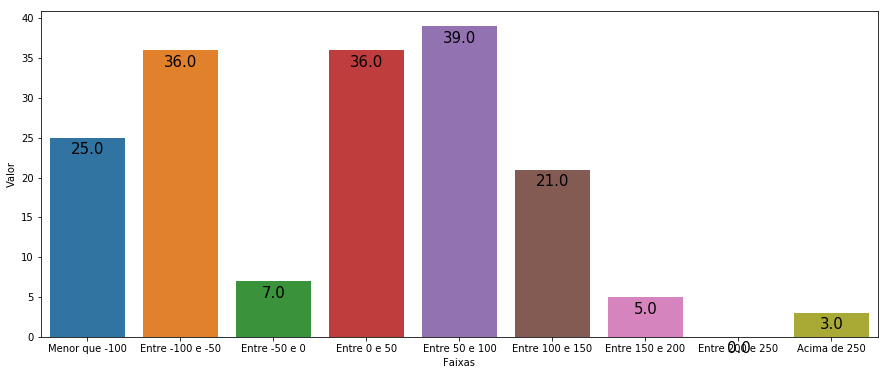

In [75]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-BBM4')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCA0E514E0>],
      dtype=object)

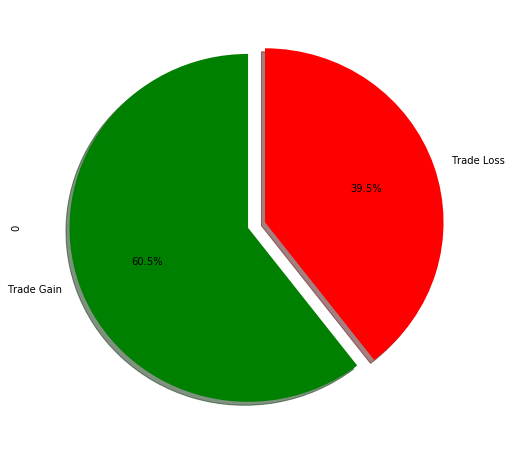

In [76]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-BBM4')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)

<a id='estudoI-HongKong'>Estudo do Set = I-HongKong<a/> - <a href='#home'>Home<a/>

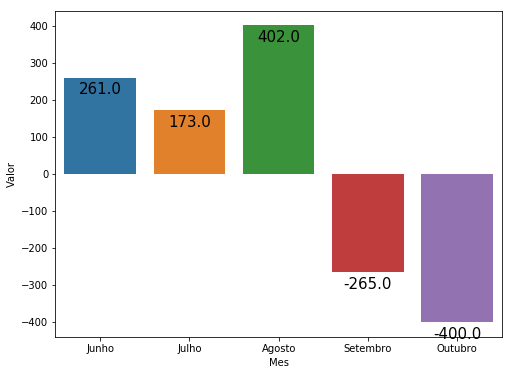

In [105]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-HongKong')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Junho","Julho","Agosto","Setembro","Outubro"]
Valor = [subcodecsaCMM4[6].values[0],
         subcodecsaCMM4[7].values[0],
         subcodecsaCMM4[8].values[0],
         subcodecsaCMM4[9].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


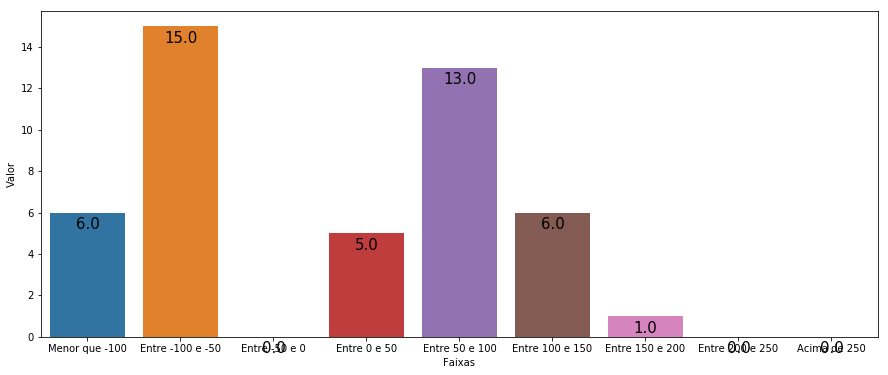

In [106]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-HongKong')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCA4B81C18>],
      dtype=object)

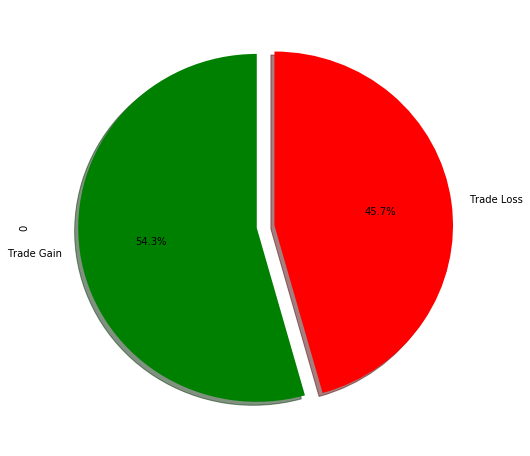

In [103]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-HongKong')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)

<a id='estudoI-RSM15'>Estudo do Set = I-RSM15<a/> - <a href='#home'>Home<a/>

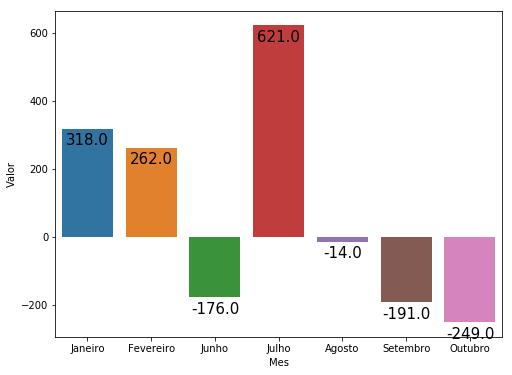

In [100]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-RSM15')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Janeiro","Fevereiro","Junho","Julho","Agosto","Setembro","Outubro"]
Valor = [subcodecsaCMM4[1].values[0],
         subcodecsaCMM4[2].values[0],
         subcodecsaCMM4[6].values[0],
         subcodecsaCMM4[7].values[0],
         subcodecsaCMM4[8].values[0],
         subcodecsaCMM4[9].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


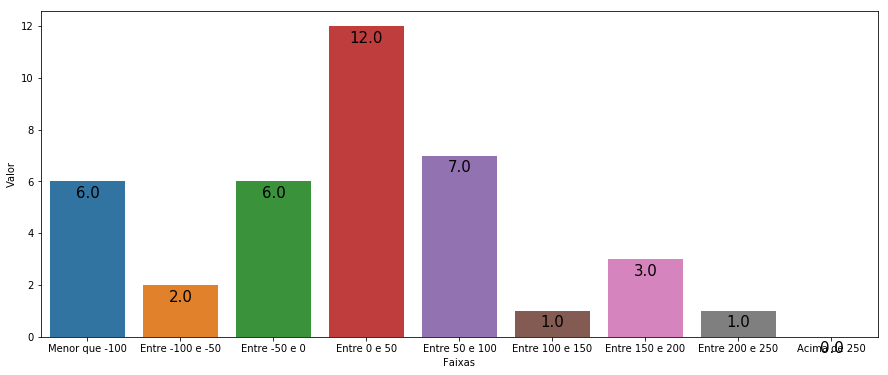

In [101]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-RSM15')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCA1F7D400>],
      dtype=object)

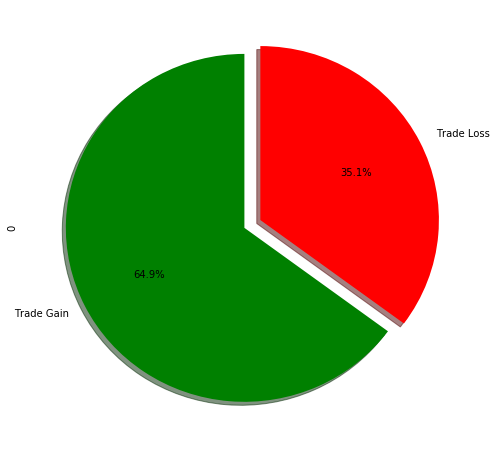

In [102]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-RSM15')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)

<a id='estudoI-TBM4-SR'>Estudo do Set = I-TBM4-SR<a/> - <a href='#home'>Home<a/>

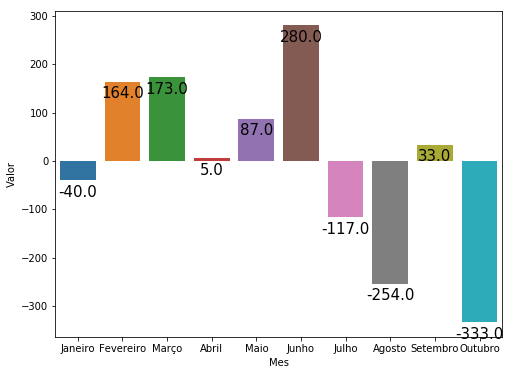

In [98]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-TBM4-SR')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Janeiro","Fevereiro","Março","Abril","Maio","Junho","Julho","Agosto","Setembro","Outubro"]
Valor = [subcodecsaCMM4[1].values[0],
         subcodecsaCMM4[2].values[0],
         subcodecsaCMM4[3].values[0],
         subcodecsaCMM4[4].values[0],
         subcodecsaCMM4[5].values[0],
         subcodecsaCMM4[6].values[0],
         subcodecsaCMM4[7].values[0],
         subcodecsaCMM4[8].values[0],
         subcodecsaCMM4[9].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


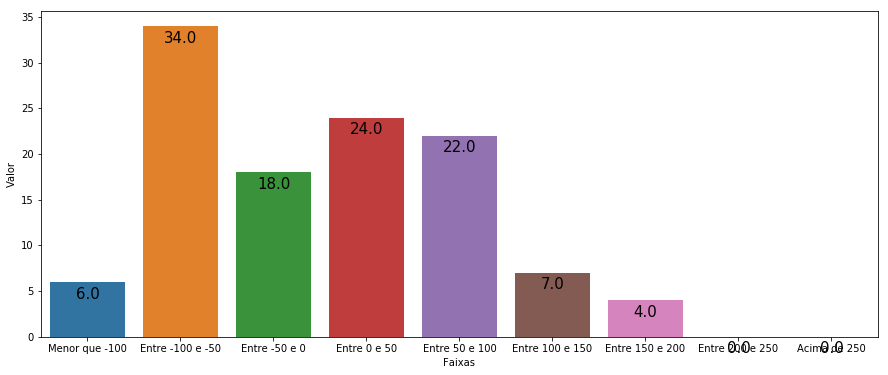

In [25]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-TBM4-SR')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCA0988048>],
      dtype=object)

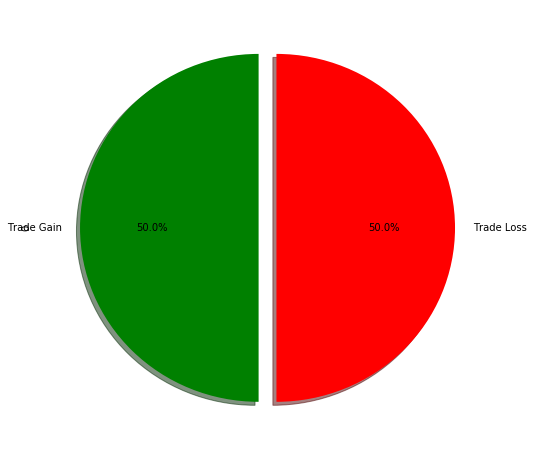

In [26]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-TBM4-SR')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)

<a id='estudoI-Pitagoras'>Estudo do Set = I-Pitagoras<a/> - <a href='#home'>Home<a/>

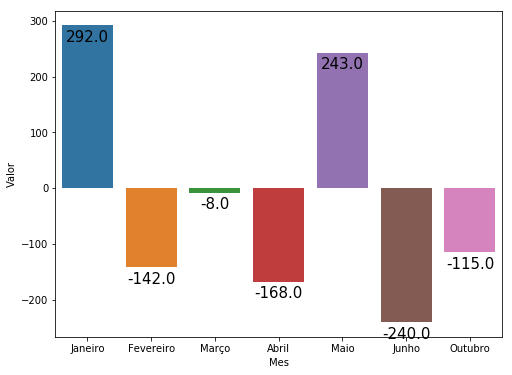

In [97]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-Pitagoras')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Janeiro","Fevereiro","Março","Abril","Maio","Junho","Outubro"]
Valor = [subcodecsaCMM4[1].values[0],
         subcodecsaCMM4[2].values[0],
         subcodecsaCMM4[3].values[0],
         subcodecsaCMM4[4].values[0],
         subcodecsaCMM4[5].values[0],
         subcodecsaCMM4[6].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


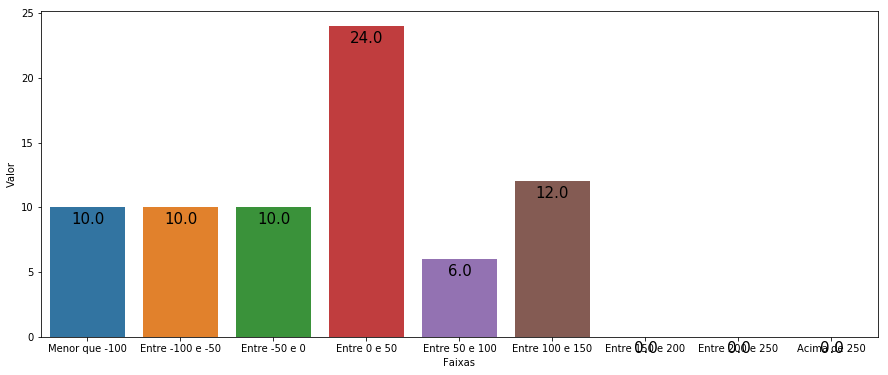

In [29]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-Pitagoras')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCA43AFE80>],
      dtype=object)

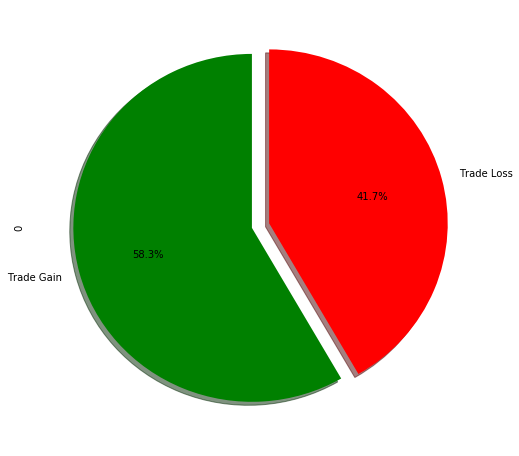

In [30]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-Pitagoras')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)

<a id='estudoI-RompR1S1v2'>Estudo do Set = I-RompR1S1v2<a/> - <a href='#home'>Home<a/>

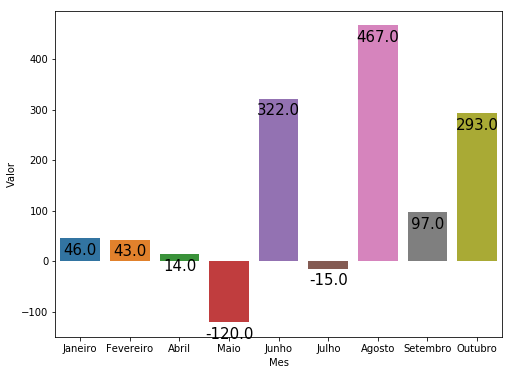

In [69]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-RompR1S1v2')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Janeiro","Fevereiro","Abril","Maio","Junho","Julho","Agosto","Setembro","Outubro"]
Valor = [subcodecsaCMM4[1].values[0],
         subcodecsaCMM4[2].values[0],
         subcodecsaCMM4[4].values[0],
         subcodecsaCMM4[5].values[0],
         subcodecsaCMM4[6].values[0],
         subcodecsaCMM4[7].values[0],
         subcodecsaCMM4[8].values[0],
         subcodecsaCMM4[9].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


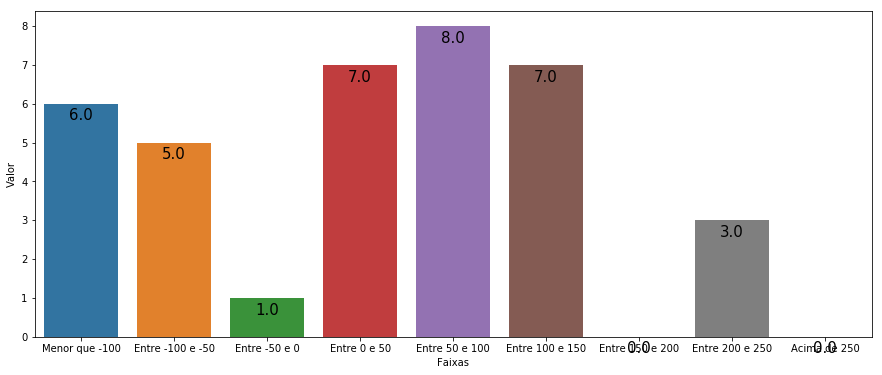

In [35]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-RompR1S1v2')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCA44E5940>],
      dtype=object)

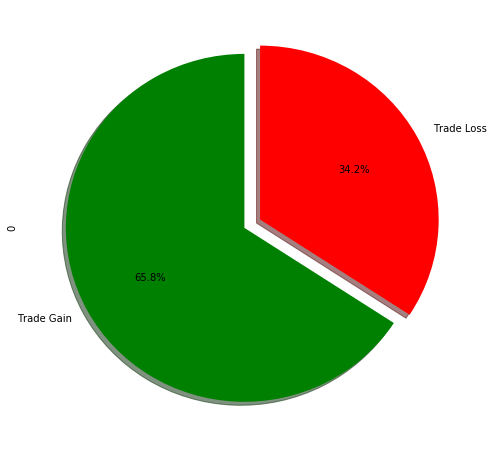

In [36]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-RompR1S1v2')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)

<a id='estudoI-KTM3'>Estudo do Set = I-KTM3<a/> - <a href='#home'>Home<a/>  

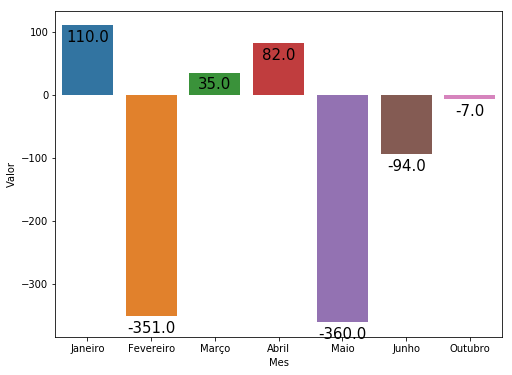

In [7]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-KTM3')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Janeiro","Fevereiro","Março","Abril","Maio","Junho","Outubro"]
Valor = [subcodecsaCMM4[1].values[0],
         subcodecsaCMM4[2].values[0],
         subcodecsaCMM4[3].values[0],
         subcodecsaCMM4[4].values[0],
         subcodecsaCMM4[5].values[0],
         subcodecsaCMM4[6].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


In [2]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-KTM3')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


NameError: name 'codecsa' is not defined

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE7FAE8C88>],
      dtype=object)

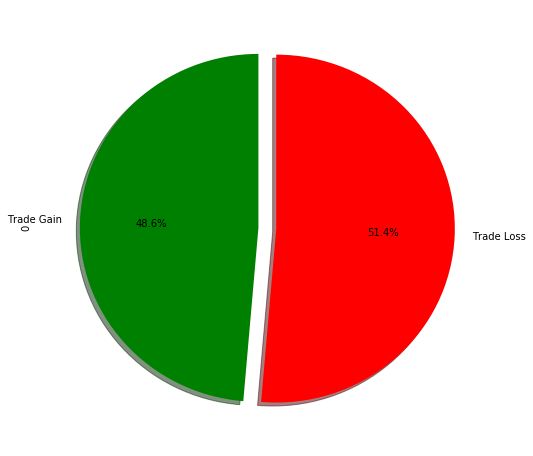

In [74]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-KTM3')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)

<a id='estudoI-FORCEM5'>Estudo do Set = I-FORCEM5<a/> - <a href='#home'>Home<a/>  

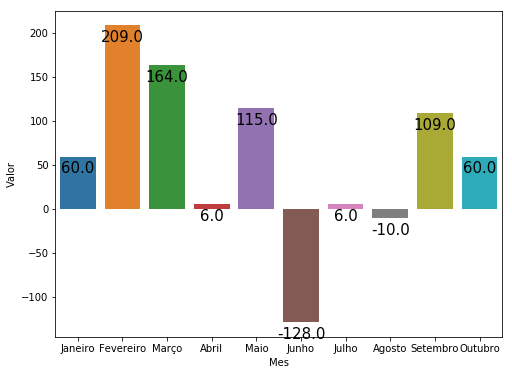

In [84]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-FORCEM5')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Janeiro","Fevereiro","Março","Abril","Maio","Junho","Julho","Agosto","Setembro","Outubro"]
Valor = [subcodecsaCMM4[1].values[0],
         subcodecsaCMM4[2].values[0],
         subcodecsaCMM4[3].values[0],
         subcodecsaCMM4[4].values[0],
         subcodecsaCMM4[5].values[0],
         subcodecsaCMM4[6].values[0],
         subcodecsaCMM4[7].values[0],
         subcodecsaCMM4[8].values[0],
         subcodecsaCMM4[9].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


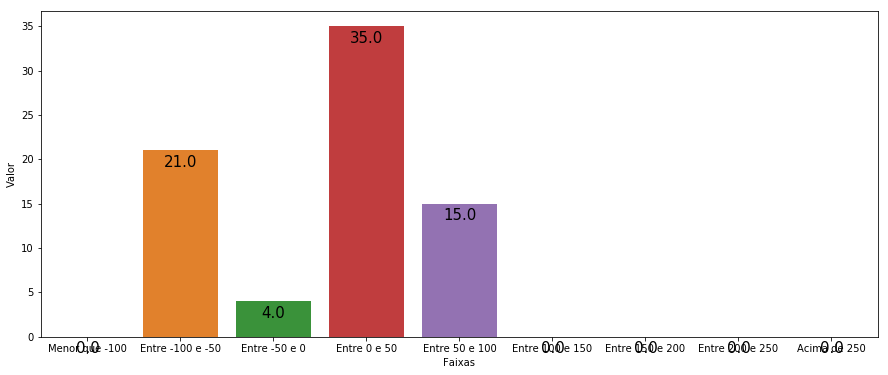

In [88]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-FORCEM5')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE7FAA6128>],
      dtype=object)

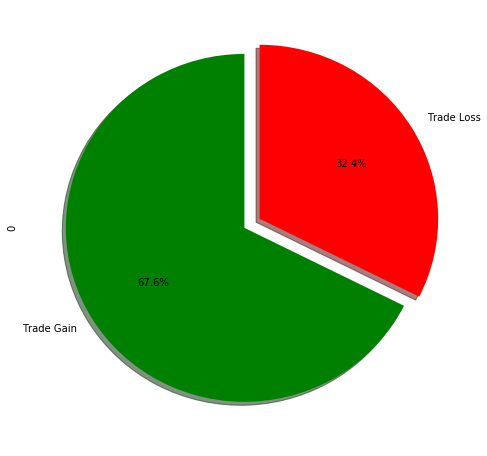

In [71]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-FORCEM5')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)